In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob
from datetime import datetime

import read_brazil_radar as rbr
import pyart
from skewt import SkewT
from csu_radartools import (csu_fhc, csu_liquid_ice_mass, csu_blended_rain, 
                            csu_dsd, csu_kdp, csu_misc, fundamentals)
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
file = rbr.read_rainbow_hdf5("../Data/RADAR/UNICAMP/level_0/2017-11-15/117BRX-20171115215006.HDF5")
file_date = pd.to_datetime(file.time['units'][14:])

In [3]:
file.fields.keys()

['corrected_reflectivity',
 'differential_phase',
 'cross_correlation_ratio',
 'filtered_differential_phase',
 'spectrum_width',
 'reflectivity',
 'differential_reflectivity',
 'specific_differential_phase',
 'velocity']

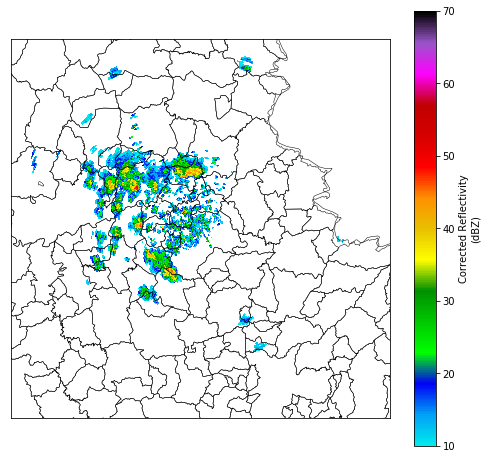

In [5]:
display = pyart.graph.RadarMapDisplay(file)
fig = plt.figure(figsize=[8.5,8])
fig.set_facecolor('w')
display.plot_ppi_map('corrected_reflectivity', sweep=0, shapefile="../Data/GENERAL/shapefiles/sao_paulo",
                         vmin = 10, vmax = 70, mask_outside=True, title_flag=False)